In [1]:
#!/bin/python

import dropbox
import datetime
import schedule
import numpy
import string
import requests

from threading import Timer
import time
import sys

import csv

import math
import random
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
import os

import matplotlib.dates as mdate

from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FormatStrFormatter

import pytz

Successful Downloading /Apps/E4Link/GSR/GSRData2019-08-20-19-20.txt from Dropbox, overwriting C:\FINAL_PROJECT\GSR_Files\GSRData2019-08-20-19-20.txt...


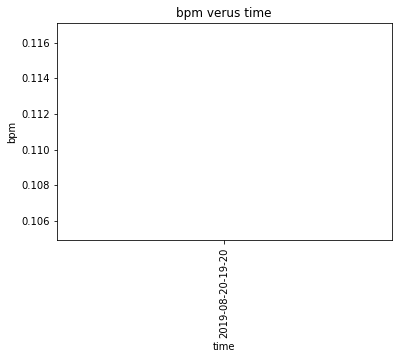

Successful Downloading /Apps/E4Link/GSR/GSRData2019-08-20-19-22.txt from Dropbox, overwriting C:\FINAL_PROJECT\GSR_Files\GSRData2019-08-20-19-22.txt...


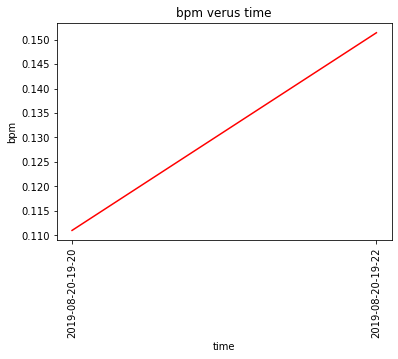

Successful Downloading /Apps/E4Link/GSR/GSRData2019-08-20-19-23.txt from Dropbox, overwriting C:\FINAL_PROJECT\GSR_Files\GSRData2019-08-20-19-23.txt...


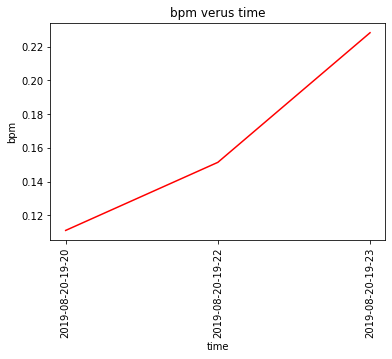

Successful Downloading /Apps/E4Link/GSR/GSRData2019-08-20-19-24.txt from Dropbox, overwriting C:\FINAL_PROJECT\GSR_Files\GSRData2019-08-20-19-24.txt...


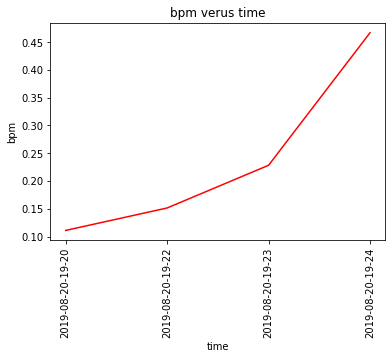

Successful Downloading /Apps/E4Link/GSR/GSRData2019-08-20-19-25.txt from Dropbox, overwriting C:\FINAL_PROJECT\GSR_Files\GSRData2019-08-20-19-25.txt...


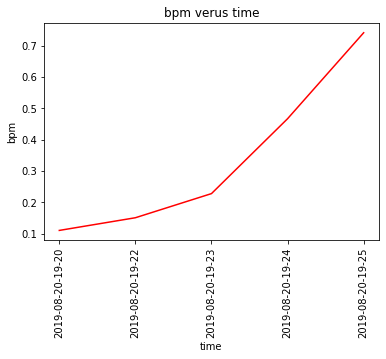

Data2019-08-20-19-26.txt current is not exsitor check the directory of download_path is exsit
Data2019-08-20-19-27.txt current is not exsitor check the directory of download_path is exsit


KeyboardInterrupt: 

In [5]:
class SC_Getting:
    
    def __init__():
        dbx = dropbox.Dropbox('lY_d3DAmzgAAAAAAAAAAtgRd7PtJ0xG4weBs1T_9Jp9pCxBjXccJlPYM7vYFC5RF')
        delta = datetime.timedelta(minutes=1)

    def E4(x, y):
        # Dropbox access token    
        dbx = dropbox.Dropbox('lY_d3DAmzgAAAAAAAAAAdn7IAKZUPyYJXhaYmllRlCFZwhYgt_m6fNafXq8DcgWK')

        # current time
        timestamp = datetime.datetime.now()
        # time gap
        delta = datetime.timedelta(minutes = 1)
        # time where the IBI file has been bulit
        filetime = timestamp - delta

        # Re-formatting: datetime->String
        Str_filetime = filetime.strftime('%Y-%m-%d-%H-%M')

        # For testing only 
        # Str_filetime = '2019-06-22-22-25'

        # Set parameters for downloading the file 
        # Saving path
        download_path = 'C:\\FINAL_PROJECT\\GSR_Files\\GSRData'+Str_filetime +'.txt'
        # File location in dropbox    
        path = '/GSR/GSRData'+Str_filetime+'.txt'
        
        # to aviod network delay
        time.sleep(10)
        
        
        # try download
        try:
            dbx.files_download_to_file(download_path,path,None)

        except:
                print('Data'+Str_filetime+'.txt current is not exsit'+ 'or check the directory of download_path is exsit')
                pass
        else:
            print("Successful Downloading /Apps/E4Link" + path + " from Dropbox, overwriting " + download_path + "...")

            # A file downloaded, reformat the file
            resval = numpy.loadtxt(download_path)

            with open(download_path, 'r') as f:
                sum = 0
                count = 0
                lines = f.readlines()  # read the content
                for line in lines:
                    for value in line.split():
                        value = value.strip(string.whitespace)
                        sum += float(value)
                        count += 1
                
                f.close()
                
            aveEDA = sum / count
            d005_EDA = int(aveEDA/0.05)
 
            x.append(Str_filetime)
            y.append(aveEDA)
                
            fig = SC_Getting.draw(x, y)

            with open('eda_data.csv', 'a', newline='') as f:
                headers = ['time', 'aveEDA','d005_EDA']
                csv_write = csv.writer(f)
                
                if not os.path.getsize("eda_data.csv"):     
                    # print('no headers')
                    csv_write.writerow(headers) # file doesn't exist yet, write a header
                
                csv_write.writerow([Str_filetime,aveEDA,d005_EDA])
                f.close()

    def bodyE4():
        x = []
        y = []
        #plt.ion()
        #plt.figure(1)
        schedule.every(1).minutes.do(SC_Getting.E4, x, y)
        while True:
            schedule.run_pending()

    def draw(x, y):
        plt.clf()
        plt.plot(x, y, '-r')
        plt.tick_params(axis='x', rotation=90)
        plt.title('eda verus time')
        plt.xlabel('time')
        plt.ylabel('eda')
        plt.pause(0.01)  # pause a bit so that plots are updated



if __name__ == "__main__":
    schedule.clear()
    
    GSRpath = 'C:\\FINAL_PROJECT\\GSR_Files' #location where you want to save your files
    GSRfolder = os.path.exists(GSRpath)
     
    if not GSRfolder:
        os.makedirs(GSRpath)
        print("folder created") 

    SC_Getting.bodyE4()
    print ('here')